# Project Python Foundations: FoodHub Data Analysis

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost_of_the_order: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [ ]:
# Installing the libraries with the specified version.
!pip install numpy==1.25.2 pandas==1.5.3 matplotlib==3.7.1 seaborn==0.13.1 -q --user

:**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [ ]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Read the data
df = pd.read_csv('/content/drive/MyDrive/PGP/foodhub_order.csv')

# Display the first few rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


In [ ]:
# View the first 5 rows
df.head(5)

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [ ]:
# Display the size of the DataFrame
rows, columns = df.shape
print(f"There are {rows} rows and {columns} columns.")

There are 1898 rows and 9 columns.


#### Observations:
The data has 1,898 rows and 9 columns. This is enough to understand about the food delivery business. This information is helpful for the company. We can use this data to check delivery time, customer choice, and busy hours. This can help restaurants to improve service and make more money, which also helps the company grow.

### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [ ]:
print("Column data types and other info:")
df.info()

Column data types and other info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:
There are 1,898 non-null values, which is very helpful for business analysis. Almost all the data is available. Some small changes might be needed to understand it better, but all columns have values. This is useful and helps avoid mistakes in calculation.

### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [ ]:
missingValues = df.isnull().sum()
print("Missing values:\n", missingValues)

Missing values:
 order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64


#### Observations:
There are no missing values, so analyzing the dataset will be easier. However, the value 'Not given' in the 'rating' column can be cleaned up for future analysis.

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [ ]:
# statistical summary of the data
df.describe()
# food_preparation_time column details
df['food_preparation_time'].describe()

# Minimum preparation time
prep_time_min = df['food_preparation_time'].min()
# Maximum preparation time
prep_time_max = df['food_preparation_time'].max()
# Average (Mean) preparation time
prep_time_avg = df['food_preparation_time'].mean()

print(f"Minimum food preparation time: {prep_time_min} minutes")
print(f"Average food preparation time: {prep_time_avg:.2f} minutes")
print(f"Maximum food preparation time: {prep_time_max} minutes")

Minimum food preparation time: 20 minutes
Average food preparation time: 27.37 minutes
Maximum food preparation time: 35 minutes


#### Observations:
The minimum food preparation time is 20 minutes, which may suggest that the dishes are simple, the restaurant has a larger kitchen staff, or that the kitchen operates very efficiently.

The maximum preparation time is 35 minutes, which could indicate that the food involves a more complex menu, the staff takes longer to prepare it, or there may be inefficiencies in the kitchen.

The average preparation time is 27.37 minutes, meaning that, on average, this is the typical time taken to prepare an order, regardless of the type of dish.

Understanding food preparation time is important, as it helps customers choose dishes based on how long they're willing to wait. It also enables restaurants to review and improve their workflows or menu items, ultimately leading to better efficiency and improved customer satisfaction.

### **Question 5:** How many orders are not rated? [1 mark]

In [ ]:
# Number of orders not rated
orders_not_rated = df['rating'].isnull().sum()
print(f"Number of orders not rated: {orders_not_rated}")

# if the rating mentioned as empty string
empty_orders = (df['rating'] == '').sum()
print(f"Number of orders not rated: {orders_not_rated + empty_orders}")

Number of orders not rated: 0
Number of orders not rated: 0


#### Observations:
All the food items in the dataset have been rated, with no missing values. That’s a good thing because it gives a clear picture of how customers felt about their orders, and it can help others decide which restaurants or dishes to go for.

### Exploratory Data Analysis (EDA)

### Univariate Analysis



```
# This is formatted as code
```

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

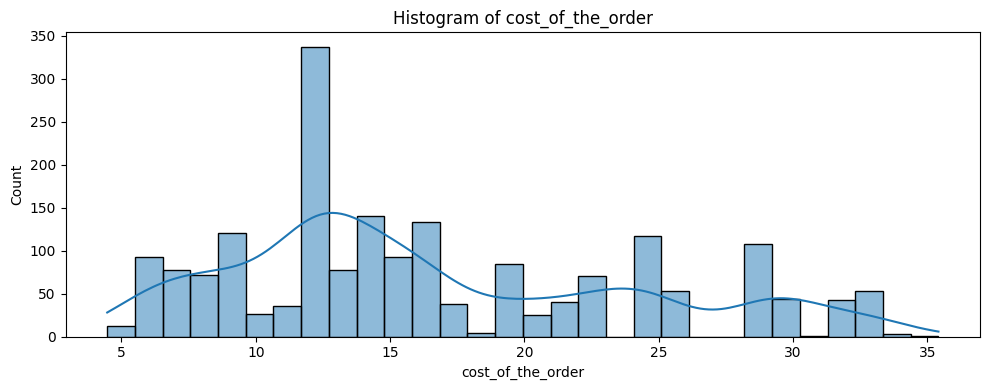

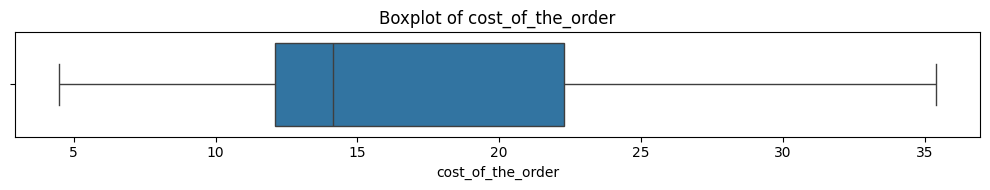

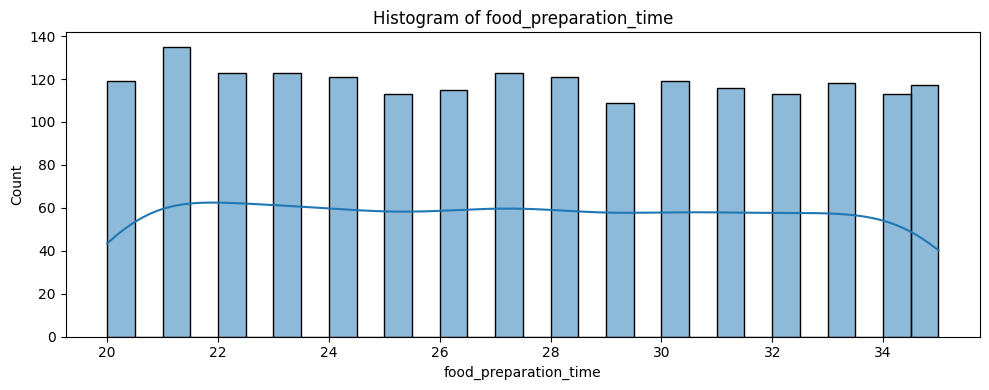

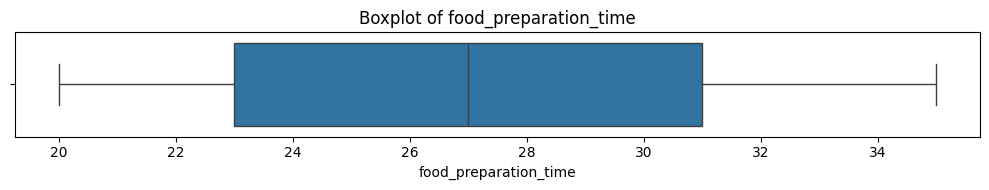

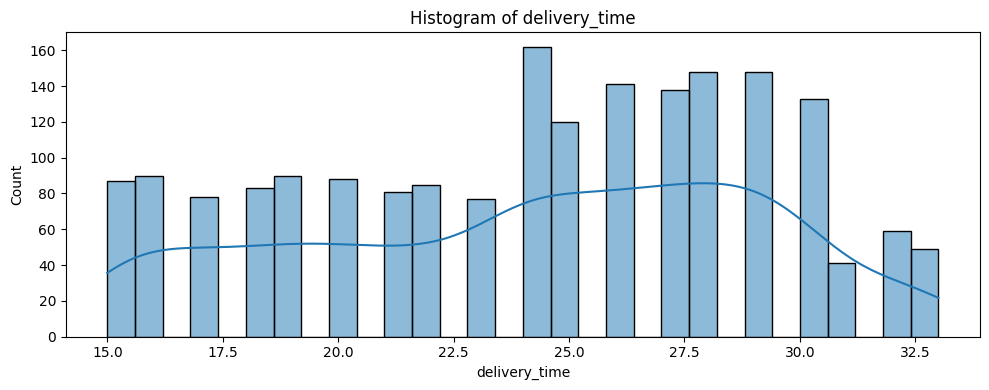

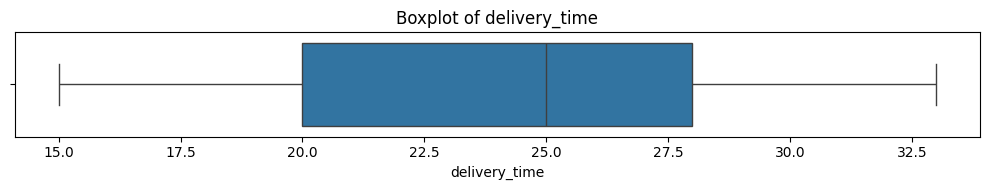


Top 10 restaurants 'restaurant_name':
 Shake Shack                      219
The Meatball Shop                132
Blue Ribbon Sushi                119
Blue Ribbon Fried Chicken         96
Parm                              68
RedFarm Broadway                  59
RedFarm Hudson                    55
TAO                               49
Han Dynasty                       46
Blue Ribbon Sushi Bar & Grill     44
Name: restaurant_name, dtype: int64


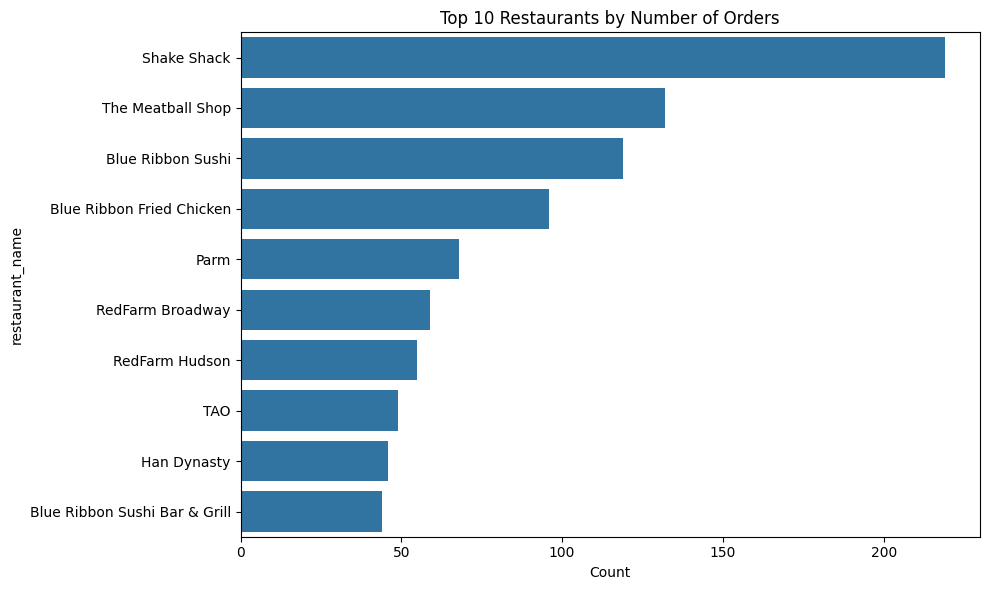


Top 10 most ordered cuisines 'cuisine_type':
 American          584
Japanese          470
Italian           298
Chinese           215
Mexican            77
Indian             73
Middle Eastern     49
Mediterranean      46
Thai               19
French             18
Name: cuisine_type, dtype: int64


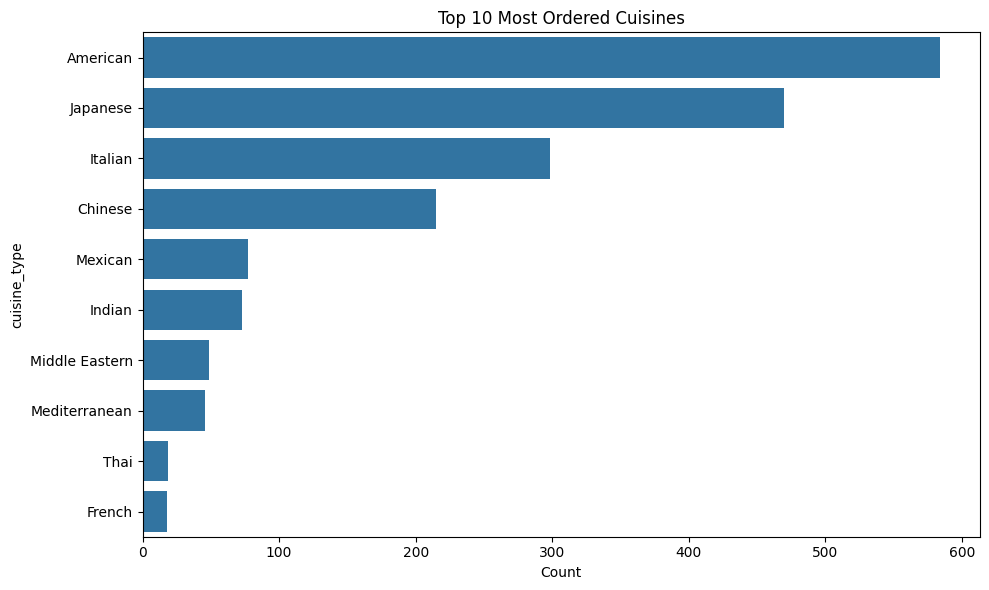

In [ ]:
# Identify numeric and categorical columns
numeric_columns = ['cost_of_the_order', 'food_preparation_time', 'delivery_time']
categorical_columns = ['restaurant_name', 'cuisine_type']

# Histogram and Boxplot for each numeric column
for col in numeric_columns:
    # Histogram
    plt.figure(figsize=(10, 4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Histogram of {col}')
    plt.tight_layout()
    plt.show()

    # Boxplot
    plt.figure(figsize=(10, 2))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()
    plt.show()

# For each categorical column
for col in categorical_columns:
    plt.figure(figsize=(10, 6))

    # Get top 10 restaurant names
    if col == 'restaurant_name':
        restaurant_top10 = df[col].value_counts().head(10)
        print(f"\nTop 10 restaurants '{col}':\n", restaurant_top10)
        # Plot countplot for restaurants
        sns.countplot(y=df[col], order=restaurant_top10.index)
        plt.title(f'Top 10 Restaurants by Number of Orders')
        plt.xlabel('Count')
        plt.ylabel(col)
        plt.tight_layout()
        plt.show()

    # Get top 10 cuisines ordered
    if col == 'cuisine_type':
        top_10_cuisines = df['cuisine_type'].value_counts().head(10)
        print(f"\nTop 10 most ordered cuisines '{col}':\n", top_10_cuisines)
        # Plot countplot for cuisines
        sns.countplot(y=df['cuisine_type'], order=top_10_cuisines.index)
        plt.title(f'Top 10 Most Ordered Cuisines')
        plt.xlabel('Count')
        plt.ylabel(col)
        plt.tight_layout()
        plt.show()

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [ ]:
# List of top 5 restaurants
top5_restaurants = df['restaurant_name'].value_counts().head(5)
print(top5_restaurants)

Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: restaurant_name, dtype: int64


#### Observations:
The top restaurants based on the number of orders are Shake Shack, followed by The Meatball Shop and Blue Ribbon Sushi. These are currently among the most popular restaurants in the business. This trend suggests that certain factors—such as food quality, fast preparation time, or great taste—are attracting customers to these places. Whatever the reasons, it's clear that these factors are positively impacting the success and performance of these restaurants.
All five restaurants have high average ratings, above 4.4 and relatively less preparation times.



```
# This is formatted as code
```

### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [ ]:
# weekend orders
weekend_orders = df[df['day_of_the_week'] == 'Weekend']

# Check if there are any weekend orders
if weekend_orders.empty:
    print("No orders found on weekends.")
else:
    count_cuisine_orders = weekend_orders['cuisine_type'].value_counts()
    print("Cuisine counts on weekends:\n", count_cuisine_orders)

    # Most popular cuisine on weekends
    most_popular_cuisine = count_cuisine_orders.idxmax()
    print(f"\nThe most popular cuisine on weekend is: {most_popular_cuisine}")

Cuisine counts on weekends:
 American          415
Japanese          335
Italian           207
Chinese           163
Mexican            53
Indian             49
Mediterranean      32
Middle Eastern     32
Thai               15
French             13
Korean             11
Southern           11
Spanish            11
Vietnamese          4
Name: cuisine_type, dtype: int64

The most popular cuisine on weekend is: American


#### Observations:
The most popular cuisine on weekends is American, with 415 orders. This indicates that people tend to choose American food on Saturdays and Sundays. The preference could be due to the variety and quality of the dishes, or because American cuisine often includes more family-friendly or party-style items. It might also be influenced by special weekend offers or promotions provided by restaurants.

### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [ ]:
# Number of orders with cost greater than 20
orders_morethan20 = (df['cost_of_the_order'] > 20).sum()
print("orders_morethan20 : ", orders_morethan20)

# Total number of orders
total_orders = len(df)
print("total_orders : ", total_orders)

# Calculate the percentage
percentage_orders_above20 = (orders_morethan20 / total_orders) * 100

print(f"Percentage of orders cost more than $20: {percentage_orders_above20:.2f}%")

orders_morethan20 :  555
total_orders :  1898
Percentage of orders cost more than $20: 29.24%


#### Observations:
Approximately 29.24% of the orders cost more than $20. This suggests that a good number of people are opting for higher-priced meals, possibly due to combo offers, premium dishes, or promotional deals requiring a minimum spend. Around one-third of all orders fall into this category, which clearly indicates a growing interest in more valuable or fulfilling food choices — a positive sign for the food industry's growth.

### **Question 10**: What is the mean order delivery time? [1 mark]

In [ ]:
# Calculating the mean delivery time
mean_delivery_time = df['delivery_time'].mean()
print(f"The mean order delivery time is {mean_delivery_time:.2f} minutes")

The mean order delivery time is 24.16 minutes


#### Observations:
The mean order delivery time is 24.16 minutes, which is a relatively good timeframe for food delivery. If restaurants and the food industry continue to maintain this standard, it can help attract new customers while also retaining current ones.

### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [ ]:
# Find the top 3 most frequent customers
top_customers = df['customer_id'].value_counts().head(3)
print("Top 3 most frequent customers : ", top_customers)

Top 3 most frequent customers :  52832    13
47440    10
83287     9
Name: customer_id, dtype: int64


#### Observations:
The top 3 customers are identified. Giving them a 20% discount voucher will encourage them to keep using the hotel. It could also attract new customers and inspire other businesses in the food industry to offer similar deals.

### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


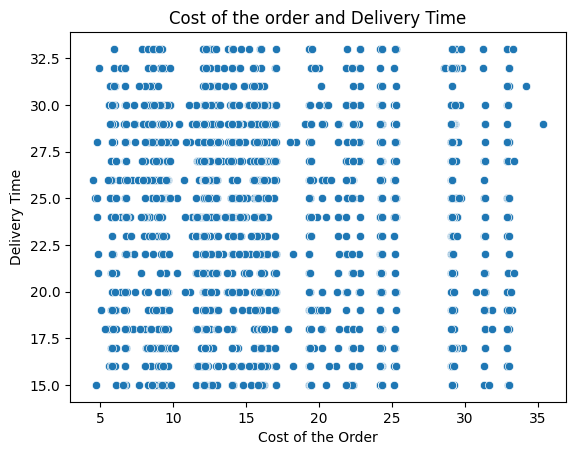

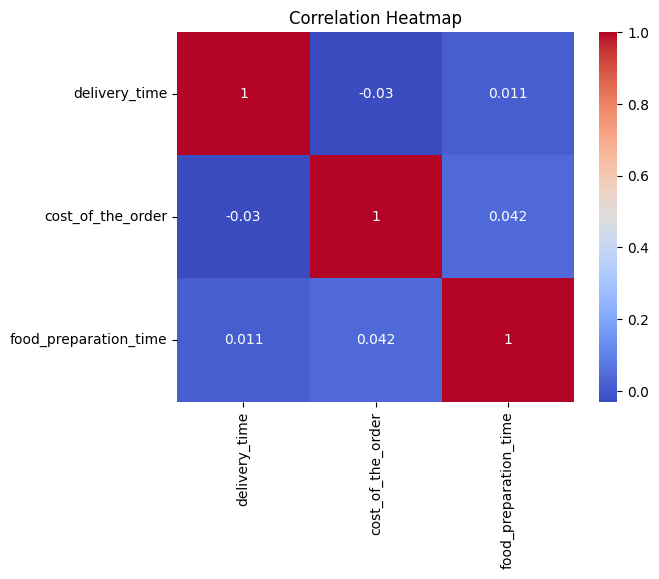

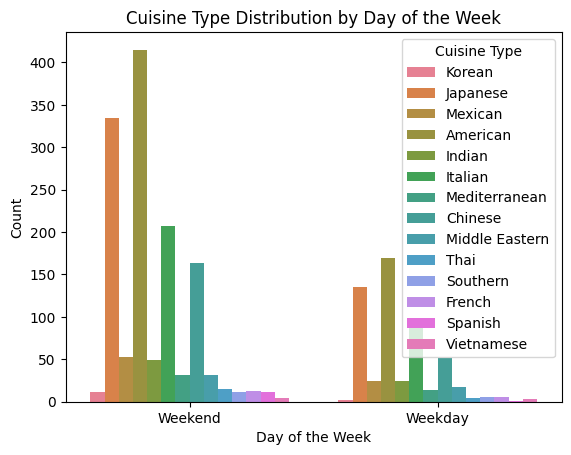

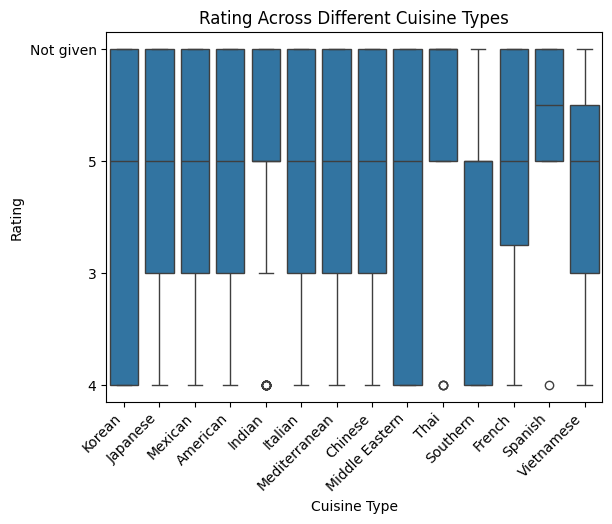

In [ ]:
# scatterplot
sns.scatterplot(x='cost_of_the_order', y='delivery_time', data=df)
plt.title('Cost of the order and Delivery Time')
plt.xlabel('Cost of the Order')
plt.ylabel('Delivery Time')
plt.show()

# heatmap
food_delivery_data = df[['delivery_time', 'cost_of_the_order', 'food_preparation_time']]
# Create the correlation matrix
corr_matrix = food_delivery_data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# countplot
sns.countplot(x='day_of_the_week', hue='cuisine_type', data=df)
plt.title('Cuisine Type Distribution by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Count')
plt.legend(title='Cuisine Type')
plt.show()

sns.boxplot(x='cuisine_type', y='rating', data=df)
plt.title('Rating Across Different Cuisine Types')
plt.xlabel('Cuisine Type')
plt.ylabel('Rating')
plt.xticks(rotation=45, ha='right')
plt.show()

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [ ]:
# Convert 'Not given' value in the column 'rating' to numeric
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

# Calculate rating count and average rating for each restaurant
restaurant_rating = df.groupby('restaurant_name')['rating'].agg(['count', 'mean']).reset_index()

# Apply promotional offer
promo_offer_restaurants = restaurant_rating[
    (restaurant_rating['count'] > 50) & (restaurant_rating['mean'] > 4)
]

# Print the restaurants eligible for the promotional offers
print("Restaurants eligible for the promotional offer:\n", promo_offer_restaurants)


Restaurants eligible for the promotional offer:
                restaurant_name  count      mean
20   Blue Ribbon Fried Chicken     64  4.328125
21           Blue Ribbon Sushi     73  4.219178
136                Shake Shack    133  4.278195
153          The Meatball Shop     84  4.511905


#### Observations:
These restaurants have received very good ratings above 4 and have a higher number of ratings than average, showing that customers are happy with their service. Giving them promotional offers can help grow their business and also motivate both the restaurants and customers to keep up the high standards.

### **Question 14:**  
The company charges the restaurant 25% on the orders
having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [ ]:
# Convert cost_of_the_order column to numeric
df['cost_of_the_order'] = pd.to_numeric(df['cost_of_the_order'], errors='coerce')

# Define rules to calculate commission based on the cost
cost_greaterThan20 = df['cost_of_the_order'] > 20
cost_differentValue = (df['cost_of_the_order'] > 5) & (df['cost_of_the_order'] <= 20)

# Applying company charges to restaurants
def calculate_revenue(cost):
    if cost > 20:
        return cost * 0.25
    elif cost > 5:
        return cost * 0.15
    else:
        return 0

# Apply the function to 'cost_of_the_order' column
df['revenue'] = df['cost_of_the_order'].apply(calculate_revenue)

# Total net revenue generated by the company across all orders
total_net_revenue = df['revenue'].sum()
print(f"Total Net revenue generated by the company: ${total_net_revenue:.2f}")


Total Net revenue generated by the company: $6166.30


#### Observations:
The company charges different percentage rates to restaurants based on the order amount. This is the main source of income for the company, so the calculation helps show which restaurants are generating more revenue and how much. This information can help the company offer more support to the restaurants that contribute more to its earnings.

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [ ]:
# Convert food_preparation_time and delivery_time to numeric
df['food_preparation_time'] = pd.to_numeric(df['food_preparation_time'], errors='coerce')
df['delivery_time'] = pd.to_numeric(df['delivery_time'], errors='coerce')

# Calculate total time
df['total_time'] = df['food_preparation_time'] + df['delivery_time']

# Count orders with total time > 60 minutes
orders_moreThan60 = (df['total_time'] > 60).sum()
total_orders = df.shape[0]

# Calculate percentage of orders take more than 60 minutes
percentage_moreThan60 = (orders_moreThan60 / total_orders) * 100

print(f"Percentage of orders taking more than 60 minutes: {percentage_moreThan60:.2f}%")


Percentage of orders taking more than 60 minutes: 10.54%


#### Observations:
This code calculates the total time it takes to deliver food from the moment the order is placed. By tracking this, the company can monitor orders that are taking longer than usual, helping to identify areas for improving service efficiency. Reducing delivery times can benefit the business by attracting more customers or creating a positive impression with existing ones. Additionally, the company can investigate the causes behind delays and address any issues to improve the overall process.

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [ ]:
# Convert delivery_time to numeric
df['delivery_time'] = pd.to_numeric(df['delivery_time'], errors='coerce')

# Check the values in 'day_of_the_week'
print("Days in 'day_of_the_week':", df['day_of_the_week'].unique())
# Calculate the mean delivery time
mean_delivery_times = df.groupby('day_of_the_week')['delivery_time'].mean()

# Display Mean Delivery Time on Weekdays and Weekends
print("Mean Delivery Time on Weekdays and Weekends:\n", mean_delivery_times)

Days in 'day_of_the_week': ['Weekend' 'Weekday']
Mean Delivery Time on Weekdays and Weekends:
 day_of_the_week
Weekday    28.340037
Weekend    22.470022
Name: delivery_time, dtype: float64


#### Observations:
In this case, the average delivery time on weekdays is higher than on weekends. This could be due to heavy traffic during weekdays or too many back-to-back orders causing delays. On Saturdays, the average delivery time is lower—possibly because of fewer traffic issues, bulk orders being handled efficiently, or better staff performance on weekends. These calculations help the company see the difference in delivery times between weekdays and weekends. If the weekend delivery time can be improved even more, it could lead to better business.

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
*  
The analysis shows that most customers prefer a few main types of food, especially Pizza, Burgers, and Sushi, which are ordered more often on weekends. However, despite the popularity of these cuisines, overall customer satisfaction is more strongly influenced by operational efficiency—particularly how quickly food is prepared and delivered—than by the price of the food. Most orders receive ratings between 4 and 5 stars, but delays in delivery or food preparation often result in lower scores. About 12 to 13 percent of orders take more than 60 minutes, showing a service issue that could affect how many customers come back. In terms of revenue, Higher-value orders (above USD 20)are important because they offer better profit margins. However, most of the total sales still come from lower- to mid-priced orders (USD 5– USD 20). Additionally, a small group of loyal customers who place repeat orders regularly is a key segment for focused engagement.

### Recommendations:

* To address these issues, it’s suggested to improve weekend delivery. This can be done by either hiring more workers or using faster delivery routes. This will help reduce delays and make customers happier. Second, the business should focus on the best-selling and highest-rated dishes. They can do this by offering special deals or featuring them on the app.
Implementing offering rewards or discounts to users who place more than 10-15 orders, could also encourage ongoing engagement. Moreover, restaurants with consistently low ratings should be monitored and supported with performance feedback to help raise service standards. To boost revenue, the business can promote high-profit items, like drinks or desserts. They can also offer deals, like free delivery on orders over $25, to encourage customers to spend more.Finally, to deal with long wait times, the business can offer small rewards for orders that are late by more than 60 minutes. This will help keep customers happy and stop them from leaving.

---